In [8]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
for i in range(5):
    plt.imshow(x_train[i], cmap="gray")
    plt.title(labels[y_train[i]])
    plt.show()

Conv Layer expects inputs in the following format `(n, w, h, c)`

- n = #number of images
- w = width
- h = height
- c = channels

In [49]:
# One Hot encoding the target variable
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [50]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Model Building

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, MaxPool2D, Input, Flatten

In [51]:
model = Sequential()
model.add(Conv2D(filters=5, kernel_size=(3,3), strides = (1,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 10 , activation="softmax"))

In [52]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [53]:
model.fit(x=x_train, y = y_train_ohe, validation_data=(x_test, y_test_ohe), batch_size=1000, epochs=100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4521 - loss: 1.9772 - val_accuracy: 0.7391 - val_loss: 0.9135
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7549 - loss: 0.7952 - val_accuracy: 0.7826 - val_loss: 0.6355
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7930 - loss: 0.6003 - val_accuracy: 0.8067 - val_loss: 0.5541
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8205 - loss: 0.5232 - val_accuracy: 0.8226 - val_loss: 0.5079
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8362 - loss: 0.4844 - val_accuracy: 0.8306 - val_loss: 0.4823
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8483 - loss: 0.4525 - val_accuracy: 0.8401 - val_loss: 0.4586
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8538 - loss: 0.4323 - val_accuracy: 0.8456 - val_loss: 0.4418
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8588 - loss: 0.4168 - val_accuracy: 0.

In [27]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (1000, 26, 26, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1000, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1000, 10)             │        13,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,652 (158.80 KB)

 Trainable params: 13,550 (52.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,102 (105.87 KB)

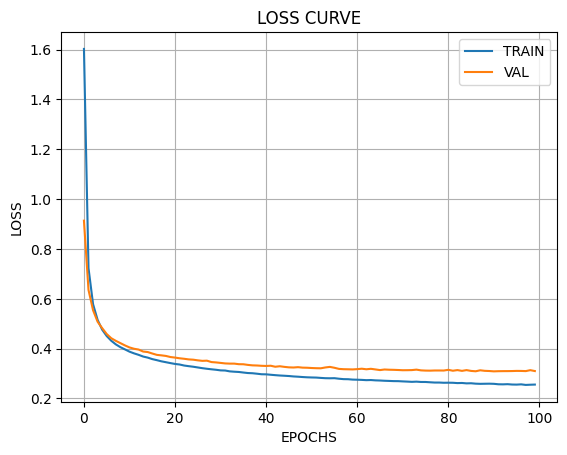

In [54]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
# plt.ylim((0,300))
plt.xlabel("EPOCHS")
plt.ylabel('LOSS')
plt.legend(["TRAIN", "VAL"])
plt.title("LOSS CURVE")
plt.grid()
plt.show()

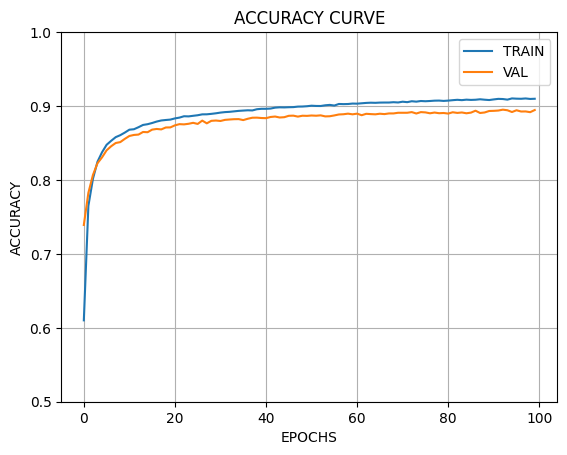

In [55]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim((0.5,1))
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend(["TRAIN", "VAL"])
plt.title("ACCURACY CURVE")
plt.grid()
plt.show()

In [65]:
model.get_weights()[0].shape

(3, 3, 1, 5)

In [66]:
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
preds.shape

(10000, 10)

In [69]:
np.argmax(preds, axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)